In [ ]:
!pip install -U scikit-learn

In [1]:
import os
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter

load_dotenv()

True

In [2]:
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_pass = os.getenv('DB_PASS')
db_name = os.getenv('DB_NAME')

connection = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection)

In [3]:
table = 'customers'
query = f"""
SELECT user_id, COUNT(*) AS purchases 
FROM {table}
WHERE event_type = 'purchase'
GROUP BY user_id 
ORDER BY purchases DESC
"""

In [4]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    data = pd.read_sql(query, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

# Mostrar las primeras filas del DataFrame
data.head()

,user_id,purchases
0,469299888,476
1,557790271,438
2,575709540,398
3,517825140,376
4,480463194,375


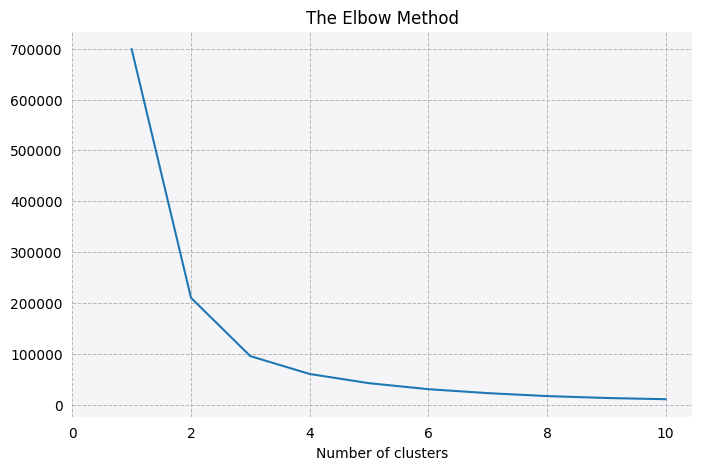

In [5]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=11).fit(data)
    wss.append(kmeans.inertia_)
    
# Crear figura y eje
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # Define 'ax' con 'plt.subplots()'

# Gráfico de línea
ax.plot(range(1, 11), wss)

# Configuración de ticks en el eje X
ax.set_xticks(range(0, 12, 2))

# Configuración del formato del eje Y
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x / 1e15)}'))

# Etiquetas y título
ax.set_xlabel("Number of clusters")
ax.set_title("The Elbow Method")

# Aplicar las propiedades estéticas
ax.set_facecolor('#F5F5F7')  # Fondo
ax.spines['top'].set_visible(False)      # Desactivar borde superior
ax.spines['right'].set_visible(False)    # Desactivar borde derecho
ax.spines['left'].set_visible(False)     # Desactivar borde izquierdo
ax.spines['bottom'].set_visible(False)   # Desactivar borde inferior

# Quitar las marcas (ticks) del eje X y Y
ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)
ax.grid(color='#B7B7B7', linestyle='--', linewidth=0.7, zorder=0)

plt.show()

Este código está implementando el método del "Codo" (Elbow Method) para determinar el número óptimo de clústeres (grupos) en un conjunto de datos utilizando el algoritmo de **K-Means**.

### 1. `wss = []`
- Se inicializa una lista vacía llamada `wss` (Within-Cluster Sum of Squares) que almacenará la suma de los cuadrados de las distancias de los puntos dentro de cada clúster para cada número de clústeres.

### 2. `for k in range(1, 11):`
- Este bucle itera `k` veces desde 1 hasta 10, donde `k` representa el número de clústeres que se quieren evaluar en cada iteración.

### 3. `kmeans = KMeans(n_clusters=k, random_state=0, n_init=11).fit(data)`
- Se crea y ajusta un modelo de K-Means con el número de clústeres igual a `k`.
- `n_clusters=k`: Número de clústeres en el modelo.
- `random_state=0`: Fija la semilla para la generación de números aleatorios, asegurando que los resultados sean reproducibles.
- `n_init=11`: Realiza 11 inicializaciones diferentes y selecciona la mejor, para reducir el riesgo de converger en un óptimo local.
- `.fit(data)`: Ajusta el modelo a los datos proporcionados (`data`).

### 4. `wss.append(kmeans.inertia_)`
- Se añade a la lista `wss` la **inercia** del modelo K-Means para cada `k`.
- `inertia_`: Es una métrica que calcula la suma de las distancias cuadráticas de los puntos dentro de un clúster a su centroide. Indica qué tan bien se agrupan los puntos en cada clúster.

### 5. `plt.plot(range(1, 11), wss)`
- Se crea un gráfico de líneas que muestra el valor de la inercia (`wss`) en función del número de clústeres (`k`), de 1 a 10.

### 6. `plt.xticks(range(0, 12, 2))`
- Configura los ticks (marcas) del eje X en los valores `0, 2, 4, 6, 8, 10`.

### 7. `plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x / 1e15)}'))`
- Se utiliza un `FuncFormatter` para formatear los valores del eje Y, dividiendo la inercia por `1e15` y mostrando los valores enteros. Esto ayuda a que los números en el eje Y sean más fáciles de leer y entender.

### 8. `plt.xlabel("Number of clusters")`
- Establece la etiqueta del eje X como "Number of clusters".

### 9. `plt.title("The Elbow Method")`
- Asigna el título del gráfico como "The Elbow Method".

### Explicación del **Método del Codo (Elbow Method)**

El Método del Codo es una técnica para seleccionar el número óptimo de clústeres en K-Means. A medida que se incrementa el número de clústeres, la inercia (`wss`) tiende a disminuir. Sin embargo, llega un punto donde agregar más clústeres ya no reduce significativamente la inercia. Este punto se identifica visualmente en el gráfico como un "codo" o un cambio de curvatura pronunciado.

#### Interpretación del gráfico:
- Se busca el punto donde la curva deja de decrecer rápidamente y comienza a "aplanarse".
- Este punto indica el número óptimo de clústeres, ya que agregar más no proporciona una mejora significativa en la calidad del agrupamiento.